### Uvod 

>U okviru projeta Blue Book for Bulldozers zadatka je bio predvideti prodajnu cenu (SalesPrice) na aukciji za pojedinačne već korišćene mašine. Predvidjalo se na osnuvu veka upotrebe svake mašine, vrste opreme i konfiguracija. Podaci su prikupljeni iz rezultata aukcije i uključuju inforamcije o upotrebi i konfiguracji mašine.

### Mera evaulacije 

> Mera evaluacija koje se koristi u zadatku je RMSLE (root mean squared log error) izmedju trenutne i predvidjene cene na aukciji.

>  Učitavanje podataka

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/bluebook-for-bulldozers/ValidSolution.csv
/kaggle/input/bluebook-for-bulldozers/Valid.zip
/kaggle/input/bluebook-for-bulldozers/Valid.csv
/kaggle/input/bluebook-for-bulldozers/Machine_Appendix.csv
/kaggle/input/bluebook-for-bulldozers/Valid.7z
/kaggle/input/bluebook-for-bulldozers/Train.7z
/kaggle/input/bluebook-for-bulldozers/TrainAndValid.csv
/kaggle/input/bluebook-for-bulldozers/random_forest_benchmark_test.csv
/kaggle/input/bluebook-for-bulldozers/Train.zip
/kaggle/input/bluebook-for-bulldozers/TrainAndValid.zip
/kaggle/input/bluebook-for-bulldozers/TrainAndValid.7z
/kaggle/input/bluebook-for-bulldozers/Data Dictionary.xlsx
/kaggle/input/bluebook-for-bulldozers/Test.csv
/kaggle/input/bluebook-for-bulldozers/median_benchmark.csv


In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
import warnings 
warnings.filterwarnings('ignore')

In [5]:
data =  pd.read_csv('/kaggle/input/bluebook-for-bulldozers/TrainAndValid.csv')
data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
SalesID                     412698 non-null int64
SalePrice                   412698 non-null float64
MachineID                   412698 non-null int64
ModelID                     412698 non-null int64
datasource                  412698 non-null int64
auctioneerID                392562 non-null float64
YearMade                    412698 non-null int64
MachineHoursCurrentMeter    147504 non-null float64
UsageBand                   73670 non-null object
saledate                    412698 non-null object
fiModelDesc                 412698 non-null object
fiBaseModel                 412698 non-null object
fiSecondaryDesc             271971 non-null object
fiModelSeries               58667 non-null object
fiModelDescriptor           74816 non-null object
ProductSize                 196093 non-null object
fiProductClassDesc          412698 non-null object
state                      

>  Pretprocesiranje podataka

In [7]:
data.isnull().sum().sort_values()

SalesID                          0
state                            0
fiProductClassDesc               0
fiBaseModel                      0
fiModelDesc                      0
ProductGroup                     0
saledate                         0
datasource                       0
ModelID                          0
MachineID                        0
SalePrice                        0
YearMade                         0
ProductGroupDesc                 0
Enclosure                      334
auctioneerID                 20136
Hydraulics                   82565
fiSecondaryDesc             140727
Coupler                     192019
Forks                       214983
ProductSize                 216605
Transmission                224691
Ride_Control                259970
MachineHoursCurrentMeter    265194
Drive_System                305611
Ripper                      305753
Undercarriage_Pad_Width     309782
Thumb                       310366
Stick_Length                310437
Pattern_Changer     


> Izbacujemo sve klone kojima fali vise od 10% od ukupne vrednosti podataka

In [8]:
data.isnull().sum().sort_values() < 412698*0.1

SalesID                      True
state                        True
fiProductClassDesc           True
fiBaseModel                  True
fiModelDesc                  True
ProductGroup                 True
saledate                     True
datasource                   True
ModelID                      True
MachineID                    True
SalePrice                    True
YearMade                     True
ProductGroupDesc             True
Enclosure                    True
auctioneerID                 True
Hydraulics                  False
fiSecondaryDesc             False
Coupler                     False
Forks                       False
ProductSize                 False
Transmission                False
Ride_Control                False
MachineHoursCurrentMeter    False
Drive_System                False
Ripper                      False
Undercarriage_Pad_Width     False
Thumb                       False
Stick_Length                False
Pattern_Changer             False
Grouser_Type  

In [9]:
data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data = pd.DataFrame(data[['SalesID', 'SalePrice', 'MachineID','ModelID','datasource', 'auctioneerID','YearMade','saledate','state','fiProductClassDesc','fiBaseModel','fiModelDesc','ProductGroup','ProductGroupDesc','Enclosure']])

>  Kolonu saledata smo konvertovali u tip podataka numeric i izbacili dane i mesece iz datuma 

In [11]:
data['saledate']=data['saledate'].apply(lambda saledate: saledate.split()[0])
data['saledate'] = pd.to_datetime(data['saledate'])
data['saledate'] = data.saledate.dt.year

In [12]:
data['saledate'] = pd.to_numeric(data['saledate'])

> Dodavanje kolone age

In [13]:
data['age']=data.saledate - data.YearMade

Text(0.5, 1.0, 'Grafikon 1: Odnos cene i godina mašina')

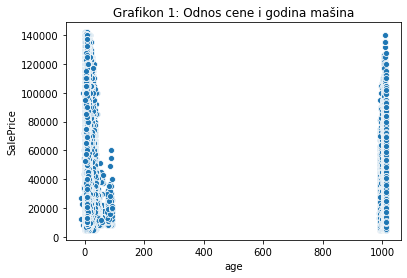

In [14]:
# Zašto su neke mašine stare i po hiljadu godina ? 
sns.scatterplot(data=data, x=data['age'], y=data['SalePrice'])
plt.title('Grafikon 1: Odnos cene i godina mašina')

In [15]:
data=pd.DataFrame(data[['SalesID', 'SalePrice', 'MachineID','ModelID','datasource', 'auctioneerID','YearMade','saledate','age','state','fiProductClassDesc','fiBaseModel','fiModelDesc','ProductGroup','ProductGroupDesc','Enclosure']])
data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,saledate,age,state,fiProductClassDesc,fiBaseModel,fiModelDesc,ProductGroup,ProductGroupDesc,Enclosure
0,1139246,66000.0,999089,3157,121,3.0,2004,2006,2,Alabama,Wheel Loader - 110.0 to 120.0 Horsepower,521,521D,WL,Wheel Loader,EROPS w AC
1,1139248,57000.0,117657,77,121,3.0,1996,2004,8,North Carolina,Wheel Loader - 150.0 to 175.0 Horsepower,950,950FII,WL,Wheel Loader,EROPS w AC
2,1139249,10000.0,434808,7009,121,3.0,2001,2004,3,New York,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,226,226,SSL,Skid Steer Loaders,OROPS
3,1139251,38500.0,1026470,332,121,3.0,2001,2011,10,Texas,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",PC120,PC120-6E,TEX,Track Excavators,EROPS w AC
4,1139253,11000.0,1057373,17311,121,3.0,2007,2009,2,New York,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,S175,S175,SSL,Skid Steer Loaders,EROPS


In [16]:
# Greška 1 - Mašine koje su proizvedene hiljadite godine
data[(data['age']>=1000) & (data['YearMade']>=1000)]

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,saledate,age,state,fiProductClassDesc,fiBaseModel,fiModelDesc,ProductGroup,ProductGroupDesc,Enclosure
9,1139275,65000.0,1016474,3883,121,3.0,1000,2007,1007,Florida,Wheel Loader - 350.0 to 500.0 Horsepower,988,988B,WL,Wheel Loader,EROPS w AC
21,1139333,34500.0,999192,3350,121,3.0,1000,2006,1006,Nevada,Motorgrader - 45.0 to 130.0 Horsepower,120,120G,MG,Motor Graders,EROPS
33,1139369,14000.0,1050658,1918,121,3.0,1000,2010,1010,Michigan,"Track Type Tractor, Dozer - 130.0 to 160.0 Hor...",750,750BLT,TTT,Track Type Tractors,OROPS
35,1139382,10000.0,1068548,112,121,3.0,1000,2011,1011,Arkansas,Wheel Loader - 275.0 to 350.0 Horsepower,95,95ZII,WL,Wheel Loader,EROPS w AC
36,1139390,8250.0,1011114,7110,121,3.0,1000,2011,1011,Mississippi,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,416,416,BL,Backhoe Loaders,OROPS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412640,6328458,10000.0,1790438,10920,149,8.0,1000,2012,1012,Alabama,Wheel Loader - 225.0 to 250.0 Horsepower,870,870,WL,Wheel Loader,OROPS
412648,6330898,13750.0,1840457,20244,149,12.0,1000,2012,1012,Mississippi,Wheel Loader - 60.0 to 80.0 Horsepower,6000,6000C,WL,Wheel Loader,OROPS
412651,6331404,11000.0,1902299,6054,149,1.0,1000,2012,1012,Florida,"Hydraulic Excavator, Track - 4.0 to 5.0 Metric...",B502,B502B,TEX,Track Excavators,EROPS
412654,6331905,17250.0,1799806,11119,149,4.0,1000,2012,1012,Florida,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,760,760,BL,Backhoe Loaders,OROPS


In [17]:
# Greška 2 - Mašne kojima je broj goida u minusu, što znači da su prvo prodate pa su tek onda proizvedene.
data[data['age']< 0]

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,saledate,age,state,fiProductClassDesc,fiBaseModel,fiModelDesc,ProductGroup,ProductGroupDesc,Enclosure
27786,1256766,27000.0,1424836,3247,132,2.0,1997,1996,-1,Indiana,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",880,880D,TEX,Track Excavators,EROPS
81843,1380049,29000.0,1189094,3538,132,1.0,2000,1999,-1,Louisiana,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,416,416C,BL,Backhoe Loaders,OROPS
161311,1582210,60000.0,1482307,28842,132,1.0,2006,2005,-1,Florida,"Hydraulic Excavator, Track - 6.0 to 8.0 Metric...",80,80C,TEX,Track Excavators,EROPS w AC
176543,1607397,72000.0,1104056,4753,132,11.0,1998,1997,-1,Mississippi,Wheel Loader - 175.0 to 200.0 Horsepower,644,644G,WL,Wheel Loader,EROPS w AC
206920,1656135,26500.0,1229496,8559,132,1.0,1998,1996,-2,California,Motorgrader - 130.0 to 145.0 Horsepower,FG75,FG75,MG,Motor Graders,OROPS
209191,1662009,8500.0,1481256,14755,132,2.0,2008,2001,-7,Pennsylvania,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,LX485,LX485,SSL,Skid Steer Loaders,OROPS
213253,1672382,12000.0,1151751,4988,132,4.0,2008,1996,-12,Florida,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,555,555B,BL,Backhoe Loaders,OROPS
231762,1725834,22500.0,1106818,8954,132,1.0,2006,1996,-10,Minnesota,"Hydraulic Excavator, Track - 21.0 to 24.0 Metr...",6625,6625,TEX,Track Excavators,EROPS
242681,1748962,27000.0,1361981,257,132,6.0,2008,1997,-11,Kentucky,"Track Type Tractor, Dozer - 190.0 to 260.0 Hor...",D65,D65E-8,TTT,Track Type Tractors,EROPS
251546,1766755,100000.0,1241578,457,132,6.0,2002,1995,-7,Texas,"Hydraulic Excavator, Track - 33.0 to 40.0 Metr...",PC300,PC300LC5,TEX,Track Excavators,EROPS


In [18]:
# Pretpostavljamo da je u koloni YearMade verovatno je došlo do greške prilikom unošenja u bazu podataka.
print(data.YearMade.min(),'- godina proizvodnje')
# Broj 1000 u koloni YearMade zamenićemo brojem 1989, jer je to najmanji broj u koloni saledate. Pretpostavljamo da je mašina prvo proizvedena pa je tek potom prodata.
print(data.saledate.min())
# Ako stavimo veći broj u koloni saledate od 1989 dobićemo broj godina u minusu kada budemo računali starost mašine,
# odnosno došlli bi do zaključka da su mašine prvo prodate pa tek posle nekoliko godine proizvedene, što nema smisla. 


1000 - godina proizvodnje
1989


In [19]:
data.YearMade.replace(1000,1989, inplace=True)
data['age'] = data.saledate - data.YearMade

In [20]:
print(data[data.age < 0]['age'])
print('------------------')
print(data[data.age < 0].size)
# Dobijamo da postoje mašine sa godinama u minusu. Tumačimo da su neke mašine prvo prodate pa su proizvedene. 
# Izbacićemo ovo iz podataka jer to smatramo greškom. Broj podataka koji izbacujemo je zanemarljiv za dalju analizu. 

27786     -1
81843     -1
161311    -1
176543    -1
206920    -2
209191    -7
213253   -12
231762   -10
242681   -11
251546    -7
295706    -2
297931    -1
395524    -2
409039    -2
410474    -2
Name: age, dtype: int64
------------------
240


In [21]:
# Porosečna cena mašine na aukciji
data.SalePrice.mean()

31215.181414012186

In [22]:
#Sada najstarija mašina u bazi ima 92 godine, ne hiljadu i više godina 
print(data.age.max())
data[data.age == 92]

92


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,saledate,age,state,fiProductClassDesc,fiBaseModel,fiModelDesc,ProductGroup,ProductGroupDesc,Enclosure
35177,1271235,8500.0,1393999,6633,132,15.0,1919,2011,92,Pennsylvania,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,1840,1840,SSL,Skid Steer Loaders,OROPS
43497,1284397,20000.0,1226376,3178,132,15.0,1919,2011,92,New Jersey,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,580,580SUPER L,BL,Backhoe Loaders,OROPS
43991,1285083,20000.0,1346350,3178,132,15.0,1919,2011,92,New Jersey,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,580,580SUPER L,BL,Backhoe Loaders,OROPS
46841,1288729,18000.0,1525079,3238,132,15.0,1919,2011,92,Pennsylvania,"Track Type Tractor, Dozer - 85.0 to 105.0 Hors...",850,850G,TTT,Track Type Tractors,OROPS
231917,1726346,12500.0,1537621,251,132,15.0,1919,2011,92,Pennsylvania,"Track Type Tractor, Dozer - 130.0 to 160.0 Hor...",D63,D63E-1,TTT,Track Type Tractors,EROPS
232111,1726799,14500.0,1189301,353,132,15.0,1919,2011,92,Pennsylvania,"Hydraulic Excavator, Track - 14.0 to 16.0 Metr...",PC150,PC150LC5,TEX,Track Excavators,EROPS
240667,1744733,17500.0,1081804,367,132,15.0,1919,2011,92,New Jersey,"Hydraulic Excavator, Track - 19.0 to 21.0 Metr...",PC200,PC200-3,TEX,Track Excavators,EROPS
248848,1762229,21500.0,1161082,590,132,15.0,1919,2011,92,New Jersey,Wheel Loader - 120.0 to 135.0 Horsepower,WA250,WA250-1,WL,Wheel Loader,OROPS
251263,1766343,19000.0,998625,457,132,15.0,1919,2011,92,Pennsylvania,"Hydraulic Excavator, Track - 33.0 to 40.0 Metr...",PC300,PC300LC5,TEX,Track Excavators,EROPS w AC


In [23]:
data[data['age']<0].index

Int64Index([ 27786,  81843, 161311, 176543, 206920, 209191, 213253, 231762,
            242681, 251546, 295706, 297931, 395524, 409039, 410474],
           dtype='int64')

In [24]:
data.drop(index=[ 27786,  81843, 161311, 176543, 206920, 209191, 213253, 231762,
            242681, 251546, 295706, 297931, 395524, 409039, 410474],inplace=True)

In [25]:
#Nemamo mašine sa minus brojm godina
data[data.age<0]

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,saledate,age,state,fiProductClassDesc,fiBaseModel,fiModelDesc,ProductGroup,ProductGroupDesc,Enclosure


Text(0.5, 1.0, 'Grafikon 4: Da li postoji veza između broja godina i cene mašine?')

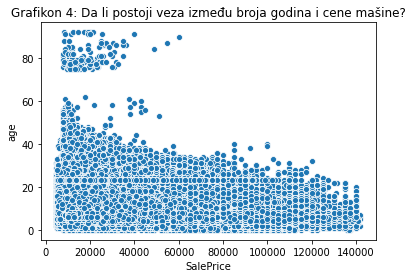

In [26]:
sns.scatterplot(data=data,x=data['SalePrice'], y=data['age'])
plt.title('Grafikon 4: Da li postoji veza između broja godina i cene mašine?')

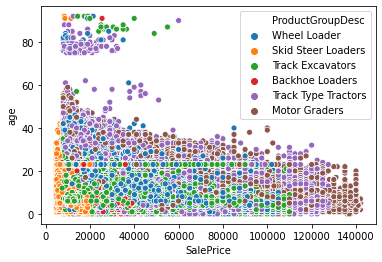

In [27]:
sns.scatterplot(data=data, x=data['SalePrice'],y=data['age'], hue=data['ProductGroupDesc'])

> Nedostajuće vrednosti 

In [28]:
data.isnull().sum().sort_values()

SalesID                   0
SalePrice                 0
MachineID                 0
ModelID                   0
datasource                0
YearMade                  0
saledate                  0
age                       0
state                     0
fiProductClassDesc        0
fiBaseModel               0
fiModelDesc               0
ProductGroup              0
ProductGroupDesc          0
Enclosure               334
auctioneerID          20136
dtype: int64

In [29]:
print(data.Enclosure.value_counts())
print('-----------------------------------')
print(data.auctioneerID.value_counts())

OROPS                  177965
EROPS                  141765
EROPS w AC              92596
EROPS AC                   18
NO ROPS                     3
None or Unspecified         2
Name: Enclosure, dtype: int64
-----------------------------------
1.0     192767
2.0      57438
3.0      30288
4.0      20876
99.0     12041
6.0      11948
7.0       7847
8.0       7419
5.0       7002
10.0      5876
9.0       4764
11.0      3822
12.0      3610
13.0      3068
18.0      2359
14.0      2277
20.0      2238
19.0      2074
16.0      1807
15.0      1742
21.0      1601
22.0      1429
24.0      1357
23.0      1322
17.0      1275
27.0      1150
25.0       959
28.0       860
26.0       796
0.0        535
Name: auctioneerID, dtype: int64


In [30]:
data.Enclosure.fillna(value='OROPS', inplace=True)
data.auctioneerID.fillna(value=1.0, inplace=True)

In [31]:
data.isnull().sum().sort_values()

SalesID               0
SalePrice             0
MachineID             0
ModelID               0
datasource            0
auctioneerID          0
YearMade              0
saledate              0
age                   0
state                 0
fiProductClassDesc    0
fiBaseModel           0
fiModelDesc           0
ProductGroup          0
ProductGroupDesc      0
Enclosure             0
dtype: int64

In [32]:
data.ProductGroupDesc.value_counts()

Track Excavators       104225
Track Type Tractors     82579
Backhoe Loaders         81399
Wheel Loader            73214
Skid Steer Loaders      45010
Motor Graders           26256
Name: ProductGroupDesc, dtype: int64

In [33]:
data.drop(['ProductGroup','state','fiBaseModel','fiModelDesc'], axis=1, inplace=True)

In [34]:
#data.drop(['fiBaseModel'], axis=1, inplace=True)

In [35]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412683 entries, 0 to 412697
Data columns (total 12 columns):
SalesID               412683 non-null int64
SalePrice             412683 non-null float64
MachineID             412683 non-null int64
ModelID               412683 non-null int64
datasource            412683 non-null int64
auctioneerID          412683 non-null float64
YearMade              412683 non-null int64
saledate              412683 non-null int64
age                   412683 non-null int64
fiProductClassDesc    412683 non-null object
ProductGroupDesc      412683 non-null object
Enclosure             412683 non-null object
dtypes: float64(2), int64(7), object(3)
memory usage: 40.9+ MB


In [36]:
data = pd.get_dummies(data=data, columns=['fiProductClassDesc','Enclosure','ProductGroupDesc'])

In [37]:
data.shape

(412683, 95)

In [38]:
data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,saledate,age,fiProductClassDesc_Backhoe Loader - 0.0 to 14.0 Ft Standard Digging Depth,...,Enclosure_EROPS w AC,Enclosure_NO ROPS,Enclosure_None or Unspecified,Enclosure_OROPS,ProductGroupDesc_Backhoe Loaders,ProductGroupDesc_Motor Graders,ProductGroupDesc_Skid Steer Loaders,ProductGroupDesc_Track Excavators,ProductGroupDesc_Track Type Tractors,ProductGroupDesc_Wheel Loader
0,1139246,66000.0,999089,3157,121,3.0,2004,2006,2,0,...,1,0,0,0,0,0,0,0,0,1
1,1139248,57000.0,117657,77,121,3.0,1996,2004,8,0,...,1,0,0,0,0,0,0,0,0,1
2,1139249,10000.0,434808,7009,121,3.0,2001,2004,3,0,...,0,0,0,1,0,0,1,0,0,0
3,1139251,38500.0,1026470,332,121,3.0,2001,2011,10,0,...,1,0,0,0,0,0,0,1,0,0
4,1139253,11000.0,1057373,17311,121,3.0,2007,2009,2,0,...,0,0,0,0,0,0,1,0,0,0


>  Kreiranje kopija 

In [39]:
data1 = data
data2 = data

In [40]:
print(data.head())
print(data1.head())
print(data2.head())

   SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1139246    66000.0     999089     3157         121           3.0      2004   
1  1139248    57000.0     117657       77         121           3.0      1996   
2  1139249    10000.0     434808     7009         121           3.0      2001   
3  1139251    38500.0    1026470      332         121           3.0      2001   
4  1139253    11000.0    1057373    17311         121           3.0      2007   

   saledate  age  \
0      2006    2   
1      2004    8   
2      2004    3   
3      2011   10   
4      2009    2   

   fiProductClassDesc_Backhoe Loader - 0.0 to 14.0 Ft Standard Digging Depth  \
0                                                  0                           
1                                                  0                           
2                                                  0                           
3                                                  0                    

>  Vizuelizacija podataka

Text(0.5, 1.0, 'Grafikon 2: Raspodela podataka SalePrice')

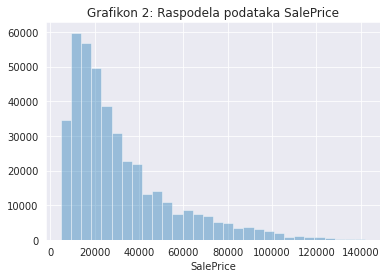

In [41]:
sns.set_style('darkgrid')
sns.distplot(data['SalePrice'], kde=False, bins=30)
# Mašine koje se najčešće kupuju su mašine sa cenom izmedju 10 000 i 40 000 dolara
plt.title('Grafikon 2: Raspodela podataka SalePrice')

Text(0.5, 1.0, 'Grafikon 3: Raspodela godina mašine')

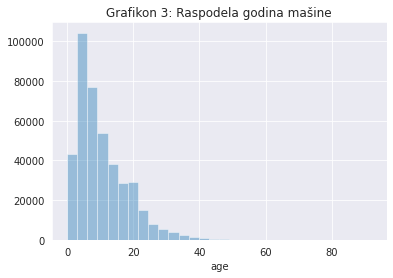

In [42]:
sns.distplot(data['age'], kde=False, bins=30)
data.age.mean()
# prosečni starosni vek mašina na aukciji je 10 godina
plt.title('Grafikon 3: Raspodela godina mašine')

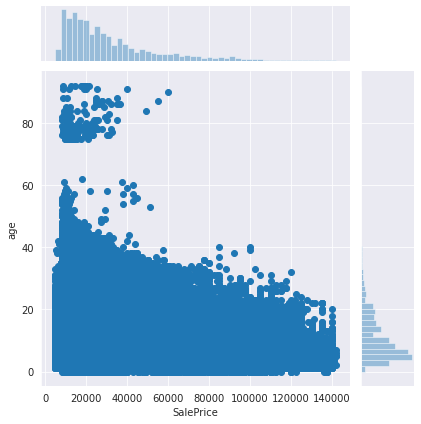

In [43]:

sns.jointplot(x='SalePrice', y='age', data=data)
# Vidimo da postoji negativna linearna korelacija izmedju broja godina i cene mašina na aukciji


>  Podela na podatak na X i y skup

In [44]:
X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

>  Odabir algoritma 


In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score

In [46]:
#podela podataka na trening i test skupove
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(288878, 94) (288878,)
(123805, 94) (123805,)


>  Racunanje greske RMSLE za Random Forest

In [48]:
def rmsle(y_test, y_pred):
    return np.sqrt(mean_squared_log_error(y_test, y_pred))


def show_scores(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {'Training RMSLE': rmsle(y_train, train_preds),
              'Test RMSLE ': rmsle(y_test, test_preds),
              'Training RMSE': np.sqrt(mean_squared_error(y_train, train_preds)),
              'Test RMSE' : np.sqrt(mean_squared_error(y_test, test_preds)),
              'Training R2' : r2_score(y_train, train_preds),
              'Test R2' : r2_score(y_test, test_preds)}
    return scores

In [49]:
from sklearn.metrics import make_scorer
rmsle_score = make_scorer(rmsle, greater_is_better=False)

In [50]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

In [51]:
print('vrednost greske rmsle i rmse')
show_scores(model_rf)

vrednost greske rmsle i rmse


{'Training RMSLE': 0.09522541698513953,
 'Test RMSLE ': 0.2356482032066463,
 'Training RMSE': 2976.409156597099,
 'Test RMSE': 7913.006153150561,
 'Training R2': 0.9834823037533488,
 'Test R2': 0.8826707452043516}

In [52]:
print('Da li je model pretreninran ?')
print(model_rf.score(X_train, y_train),' - train')
print(model_rf.score(X_test, y_test),' - test')

Da li je model pretreninran ?
0.9834823037533489  - train
0.8826707452043515  - test


In [ ]:
#model_rf_cv=cross_val_score(estimator=hyper_rf, X=X_train, y=y_train, cv=3, scoring=rmsle_score)

In [ ]:
#print('Tačnost modela')
#print("Accuracy: %0.2f (+/- %0.2f)" % (model_rf_cv.mean(), model_rf_cv.std() * 2))

In [53]:
forest = RandomForestRegressor()
max_depth = [None,3,5,10]
n_estimators =[10,100]
min_samples_split = np.arange(4,10,3)
min_samples_leaf = np.arange(4,10,3)
   

rf_params = {'max_depth':max_depth,'n_estimators':n_estimators, 'min_samples_split':min_samples_split, 'min_samples_leaf':min_samples_leaf}
grid=GridSearchCV(forest, rf_params, cv=3, scoring=rmsle_score)
grid.fit(X_train,y_train)
print('Best param: ', grid.best_params_)

KeyboardInterrupt: 

In [ ]:
### Optimizacija parametara Random Forest algoritma
#forest = RandomForestRegressor(random_state=42)
#rf_grid = {"n_estimators": np.arange(10, 100, 10),
#           "max_depth": [None, 3, 5, 10],
#           "min_samples_split": np.arange(2, 20, 2),
#           "min_samples_leaf": np.arange(1, 20, 2),
#           "max_features": [0.5, 1, "sqrt", "auto"]}

#grid = GridSearchCV(forest, rf_grid, cv=3)
#grid.fit(X_train,y_train)
#print('Best param: ', grid.best_params_)

In [54]:
hyper_rf = RandomForestRegressor(n_estimators=100,
                                 max_depth = None,
                                 min_samples_leaf=4,
                                 min_samples_split=4,
                                 max_features=0.5 )
hyper_rf.fit(X_train, y_train)
y_pred = hyper_rf.predict(X_test)

In [55]:
print('vrednost greske rmsle i rmse')
show_scores(hyper_rf)

vrednost greske rmsle i rmse


{'Training RMSLE': 0.176849673109704,
 'Test RMSLE ': 0.2373604008097208,
 'Training RMSE': 5863.903212168283,
 'Test RMSE': 7932.55458338062,
 'Training R2': 0.9358882254007387,
 'Test R2': 0.882090324619493}

In [56]:
print(hyper_rf.score(X_train, y_train),'train')
print(hyper_rf.score(X_test, y_test),'test')

0.9358882254007386 train
0.882090324619493 test


In [ ]:
#hyper_rf_cv=cross_val_score(estimator=hyper_rf, X=X_train, y=y_train, cv=3, scoring=rmsle_score)

In [ ]:
#print('Tačnost modela')
#print("Accuracy: %0.2f (+/- %0.2f)" % (hyper_rf_cv.mean(), hyper_rf_cv.std() * 2))

>  XG Boost Regressor

In [58]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
data.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in data.columns.values]

X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

>  Računanje greške RMSLE za XG Boost 

In [59]:
def rmsle_xgb(y_test, y_pred):
    return np.sqrt(np.mean(np.square((np.log1p(y_test)-np.log1p(y_pred))**2)))

def show_scores_xgb(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {'Training RMSLE': rmsle_xgb(y_train, train_preds),
              'Test RMSLE ': rmsle_xgb(y_test, test_preds),
              'Training RMSE': np.sqrt(mean_squared_error(y_train, train_preds)),
              'Test RMSE' : np.sqrt(mean_squared_error(y_test, test_preds)),
              'Training R2' : r2_score(y_train, train_preds),
              'Test R2' : r2_score(y_test, test_preds)}
    return scores

In [60]:
rmsle_xgb_scores = make_scorer(rmsle_xgb, greater_is_better=False)

In [61]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred=xgb.predict(X_test)

In [62]:
print('Vrednost greške RMSLE i RMSE')
show_scores_xgb(xgb)

Vrednost greške RMSLE i RMSE


{'Training RMSLE': 0.16327038383304635,
 'Test RMSLE ': 0.172784512178136,
 'Training RMSE': 8224.609325389156,
 'Test RMSE': 8451.828045793001,
 'Training R2': 0.8738768621435477,
 'Test R2': 0.866148078282354}

In [63]:
print(xgb.score(X_train, y_train),' - Trening')
print(xgb.score(X_test, y_test), '- Test')

0.8738768621435477  - Trening
0.866148078282354 - Test


In [ ]:
#xgb_cv=cross_val_score(estimator=xgb, X=X_train, y=y_train, cv=3, scoring=rmsle_xgb_scores)
#print("Tačnost modela: " ,xgb_cv.mean(), '+/-',xgb_cv.std())#

In [64]:
param_grid = [{'max_depht': np.arange(6,10,2)}]

grid = GridSearchCV(xgb, param_grid, cv=3, scoring=rmsle_xgb_scores)
grid.fit(X_train,y_train)
print('Best param: ', grid.best_params_)

Best param:  {'max_depht': 6}


In [65]:
param_grid = [{'min_child_weight': np.arange(2,6,2)}]

grid = GridSearchCV(xgb, param_grid, cv=3, scoring=rmsle_xgb_scores)
grid.fit(X_train,y_train)
print('Best param: ', grid.best_params_)

Best param:  {'min_child_weight': 4}


In [66]:
param_grid = [{'n_estimators': [100,1000]}]

grid = GridSearchCV(xgb, param_grid, cv=3, scoring=rmsle_xgb_scores)
grid.fit(X_train,y_train)
print('Best param: ', grid.best_params_)

Best param:  {'n_estimators': 1000}


In [67]:
#param_grid = [{'max_depht': range(3,10,1), 'min_child_weight': range(1,6,1),'gamma':[i/10.0 for i in range(0,5)],
#              'subsample':[i/10.0 for i in range(6,10)], 'colsample_bytree':[i/10.0 for i in range(6,10)], 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]}]
                  
#grid = GridSearchCV(xgb, param_grid, cv=3)
#grid.fit(X_train,y_train)
#print('Best param: ', grid.best_params_)

In [68]:
xgb_hyper = XGBRegressor(
    learning_rate =0.13,
    n_estimators=1000,
    max_depth=6,
    min_child_weight=4)

xgb_hyper.fit(X_train, y_train)
y_pred = xgb_hyper.predict(X_test)

In [69]:
print('Vrednost greške RMSLE')
show_scores_xgb(xgb_hyper)

Vrednost greške RMSLE


{'Training RMSLE': 0.11329492145157229,
 'Test RMSLE ': 0.13896495502682016,
 'Training RMSE': 6742.315561806464,
 'Test RMSE': 7522.987953139004,
 'Training R2': 0.9152416757829273,
 'Test R2': 0.8939516201054463}

In [70]:
print('Da li je model pretreniran ?')
print(xgb_hyper.score(X_train, y_train),' - Trening')
print(xgb_hyper.score(X_test, y_test), '- Test')

Da li je model pretreniran ?
0.9152416757829274  - Trening
0.8939516201054463 - Test


In [ ]:
#xgb_cv_hyper=cross_val_score(estimator=xgb_hyper, X=X_train, y=y_train, cv=3,scoring=rmsle_xgb_scores)#

In [ ]:
#print("Tačnost modela: ", xgb_cv_hyper.mean(), '+/-', xgb_cv_hyper.std())

>  Selekcija atributa

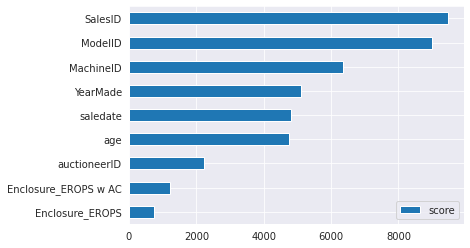

In [72]:
feature_important=xgb_hyper.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

att = pd.DataFrame(data=values, index=keys, columns=['score']).sort_values(by='score', ascending=True)
att[att.score >500].plot(kind='barh')

In [73]:
att[att.score >500].index

Index(['Enclosure_EROPS', 'Enclosure_EROPS w AC', 'auctioneerID', 'age',
       'saledate', 'YearMade', 'MachineID', 'ModelID', 'SalesID'],
      dtype='object')

In [74]:
df=pd.DataFrame(data=data, columns=att[att.score >500].index)
df.head()

,Enclosure_EROPS,Enclosure_EROPS w AC,auctioneerID,age,saledate,YearMade,MachineID,ModelID,SalesID
0,0,1,3.0,2,2006,2004,999089,3157,1139246
1,0,1,3.0,8,2004,1996,117657,77,1139248
2,0,0,3.0,3,2004,2001,434808,7009,1139249
3,0,1,3.0,10,2011,2001,1026470,332,1139251
4,1,0,3.0,2,2009,2007,1057373,17311,1139253


In [75]:
X= df
y= y

In [76]:
#podela podataka na trening i test skupove
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [77]:
att_rf1 = RandomForestRegressor()
att_rf1.fit(X_train, y_train)
y_pred = att_rf1.predict(X_test)

In [78]:
print('Vrednost greške RMSLE i RMSE')
show_scores(att_rf1)

Vrednost greške RMSLE i RMSE


{'Training RMSLE': 0.10479678571788217,
 'Test RMSLE ': 0.2540250493789439,
 'Training RMSE': 3175.251280457944,
 'Test RMSE': 8380.678896037862,
 'Training R2': 0.9812016205727432,
 'Test R2': 0.8683921763007088}

In [79]:
print('Da li je model pretreniran ?')
print(att_rf1.score(X_train, y_train),' - Trening')
print(att_rf1.score(X_test, y_test), '- Test')

Da li je model pretreniran ?
0.9812016205727432  - Trening
0.8683921763007088 - Test


In [ ]:
max_depth = [None,3,5,10]
n_estimators =[10,100]
min_samples_split = np.arange(4,10,3)
min_samples_leaf = np.arange(4,10,3)
   

rf_params = {'max_depth':max_depth,'n_estimators':n_estimators, 'min_samples_split':min_samples_split, 'min_samples_leaf':min_samples_leaf}
grid=GridSearchCV(att_rf1, rf_params, cv=3, scoring=rmsle_score)
grid.fit(X_train,y_train)
print('Best param: ', grid.best_params_)

In [80]:
att_rf = RandomForestRegressor(n_estimators=100,
                                 max_depth = None,
                                 min_samples_leaf=4,
                                 min_samples_split=4,
                                 max_features=0.5 )
att_rf.fit(X_train, y_train)
y_pred = att_rf.predict(X_test)

In [81]:
#att_rf_cv=cross_val_score(estimator=att_rf, X=X_train, y=y_train, cv=3,scoring=rmsle_score)
#print("Tačnost modela: ", att_rf_cv.mean(), '+/-' , att_rf_cv.std())

In [82]:
print('Vrednost greške RMSLE i RMSE')
show_scores(att_rf)

Vrednost greške RMSLE i RMSE


{'Training RMSLE': 0.21055199146480932,
 'Test RMSLE ': 0.2795594785732312,
 'Training RMSE': 6899.65973214732,
 'Test RMSE': 9250.279155756078,
 'Training R2': 0.9112395371632386,
 'Test R2': 0.8396632841894291}

In [83]:
print(att_rf.score(X_train, y_train), '- Trening')
print(att_rf.score(X_test, y_test), '- Test')

0.9112395371632385 - Trening
0.8396632841894291 - Test


In [85]:
xgb_att1 = XGBRegressor()
xgb_att1.fit(X_train, y_train)
y_pred=xgb_att1.predict(X_test)

In [86]:
show_scores_xgb(xgb_att1)

{'Training RMSLE': 0.19525017791790739,
 'Test RMSLE ': 0.20531404003733325,
 'Training RMSE': 9025.663617201679,
 'Test RMSE': 9265.77370995197,
 'Training R2': 0.8481123374963339,
 'Test R2': 0.8391256946581789}

In [87]:
print(xgb_att1.score(X_train, y_train), '- Trening')
print(xgb_att1.score(X_test, y_test), '- Test')

0.8481123374963339 - Trening
0.8391256946581789 - Test


In [88]:
param_grid = [{'max_depht': np.arange(6,10,2)}]

grid = GridSearchCV(xgb_att1, param_grid, cv=3, scoring=rmsle_xgb_scores)
grid.fit(X_train,y_train)
print('Best param: ', grid.best_params_)

Best param:  {'max_depht': 6}


In [89]:
param_grid = [{'min_child_weight': np.arange(2,6,2)}]

grid = GridSearchCV(xgb_att1, param_grid, cv=3, scoring=rmsle_xgb_scores)
grid.fit(X_train,y_train)
print('Best param: ', grid.best_params_)

Best param:  {'min_child_weight': 4}


In [90]:
param_grid = [{'n_estimators': [100,1000]}]

grid = GridSearchCV(xgb_att1, param_grid, cv=3, scoring=rmsle_xgb_scores)
grid.fit(X_train,y_train)
print('Best param: ', grid.best_params_)

Best param:  {'n_estimators': 1000}


In [91]:
xgb_att = XGBRegressor(
    learning_rate =0.13,
    n_estimators=1000,
    max_depth=6,
    min_child_weight=2
)

xgb_att.fit(X_train, y_train)
y_pred = xgb_att.predict(X_test)

In [92]:
#xgb_att_cv = cross_val_score(estimator=xgb_att, X=X_train, y=y_train, cv=3,scoring=rmsle_xgb_scores)
#print("Tačnost modela: ",xgb_att_cv.mean(), '+/-', xgb_att_cv.std())

In [93]:
show_scores_xgb(xgb_att)

{'Training RMSLE': 0.1287537021496224,
 'Test RMSLE ': 0.16251420462327568,
 'Training RMSE': 7080.7756917467805,
 'Test RMSE': 7963.242102855738,
 'Training R2': 0.9065184542193061,
 'Test R2': 0.8811762800140568}

In [94]:
print(xgb_att.score(X_train, y_train), ' - Trening')
print(xgb_att.score(X_test, y_test), ' - Test')

0.9065184542193061  - Trening
0.8811762800140568  - Test


>  Izbacivanje izuzetaka

In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
scaler = StandardScaler()
data_prep_norm = scaler.fit_transform(data1)
data_prep_norm = pd.DataFrame(data_prep_norm, columns=data1.columns)
data_prep_norm.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,saledate,age,fiProductClassDesc_Backhoe Loader - 0.0 to 14.0 Ft Standard Digging Depth,...,Enclosure_EROPS w AC,Enclosure_NO ROPS,Enclosure_None or Unspecified,Enclosure_OROPS,ProductGroupDesc_Backhoe Loaders,ProductGroupDesc_Motor Graders,ProductGroupDesc_Skid Steer Loaders,ProductGroupDesc_Track Excavators,ProductGroupDesc_Track Type Tractors,ProductGroupDesc_Wheel Loader
0,-0.807291,1.503137,-0.508815,-0.603462,-1.468808,-0.197447,1.131459,0.289044,-1.169087,-0.101388,...,1.859250,-0.002696,-0.002201,-0.872189,-0.495689,-0.260664,-0.349884,-0.581283,-0.500161,2.153292
1,-0.807290,1.114228,-2.450515,-1.093847,-1.468808,-0.197447,0.273743,-0.054537,-0.378335,-0.101388,...,1.859250,-0.002696,-0.002201,-0.872189,-0.495689,-0.260664,-0.349884,-0.581283,-0.500161,2.153292
2,-0.807289,-0.916740,-1.751865,0.009837,-1.468808,-0.197447,0.809816,-0.054537,-1.037295,-0.101388,...,-0.537851,-0.002696,-0.002201,1.146541,-0.495689,-0.260664,2.858093,-0.581283,-0.500161,-0.464405
3,-0.807287,0.314805,-0.448498,-1.053247,-1.468808,-0.197447,0.809816,1.147997,-0.114751,-0.101388,...,1.859250,-0.002696,-0.002201,-0.872189,-0.495689,-0.260664,-0.349884,1.720331,-0.500161,-0.464405
4,-0.807285,-0.873528,-0.380422,1.650079,-1.468808,-0.197447,1.453102,0.804416,-1.169087,-0.101388,...,-0.537851,-0.002696,-0.002201,-0.872189,-0.495689,-0.260664,2.858093,-0.581283,-0.500161,-0.464405


In [98]:
data_prep_norm.shape

(412683, 95)

In [99]:
from scipy import stats

In [100]:
stats.zscore(data_prep_norm)
df_izuzeci = data_prep_norm.loc[(np.abs(stats.zscore(data_prep_norm)) < 3).all(axis=1), :]
df_izuzeci.shape

(52076, 95)

In [101]:
df_izuzeci=pd.DataFrame(scaler.inverse_transform(df_izuzeci), columns=df_izuzeci.columns)
df_izuzeci.shape

(52076, 95)

In [102]:
df_izuzeci.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,saledate,age,fiProductClassDesc_Backhoe Loader - 0.0 to 14.0 Ft Standard Digging Depth,...,Enclosure_EROPS w AC,Enclosure_NO ROPS,Enclosure_None or Unspecified,Enclosure_OROPS,ProductGroupDesc_Backhoe Loaders,ProductGroupDesc_Motor Graders,ProductGroupDesc_Skid Steer Loaders,ProductGroupDesc_Track Excavators,ProductGroupDesc_Track Type Tractors,ProductGroupDesc_Wheel Loader
0,1139255.0,26500.0,1001274.0,4605.0,121.0,3.0,2004.0,2008.0,4.0,0.0,...,-2.775558e-17,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.775558e-17,0.0
1,1139261.0,27000.0,902002.0,3539.0,121.0,3.0,2001.0,2005.0,4.0,0.0,...,-2.775558e-17,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.775558e-17,0.0
2,1139278.0,24000.0,1024998.0,4605.0,121.0,3.0,2004.0,2008.0,4.0,0.0,...,-2.775558e-17,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.775558e-17,0.0
3,1139284.0,30500.0,1068082.0,3542.0,121.0,3.0,2001.0,2006.0,5.0,0.0,...,-2.775558e-17,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.775558e-17,0.0
4,1139290.0,28000.0,1058450.0,5162.0,121.0,3.0,2004.0,2006.0,2.0,0.0,...,-2.775558e-17,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.775558e-17,0.0


In [103]:
X = df_izuzeci.drop(['SalePrice'], axis=1)
y = df_izuzeci['SalePrice']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [105]:
rf_outlier = RandomForestRegressor()
rf_outlier.fit(X_train, y_train)
y_pred = rf_outlier.predict(X_test)

In [106]:
print('vrednost greske rmsle i rmse')
show_scores(rf_outlier)

vrednost greske rmsle i rmse


{'Training RMSLE': 0.060709827985491904,
 'Test RMSLE ': 0.1577042809929157,
 'Training RMSE': 1211.698187378891,
 'Test RMSE': 3234.8867550003342,
 'Training R2': 0.973184806434327,
 'Test R2': 0.8083466218612461}

In [107]:
print(rf_outlier.score(X_train, y_train), '- Trening')
print(rf_outlier.score(X_test, y_test), '- Test')

0.973184806434327 - Trening
0.808346621861246 - Test


In [108]:
#rf_outlier_cv = cross_val_score(estimator=rf_outlier, X=X_train, y=y_train, cv=3, scoring=rmsle_score)
#print('Tačnost modela: ', rf_outlier_cv.mean(), '+/-' , rf_outlier_cv.std())

In [109]:
rf_grid = {"n_estimators": [10,100,1000]}

grid = GridSearchCV(rf_outlier, rf_grid, cv=3, scoring=rmsle_score)
grid.fit(X_train,y_train)
print('Best param: ', grid.best_params_)

Best param:  {'n_estimators': 1000}


In [110]:
rf_grid = {"max_depth": [None, 3, 5, 10]}

grid = GridSearchCV(rf_outlier, rf_grid, cv=3, scoring=rmsle_score)
grid.fit(X_train,y_train)
print('Best param: ', grid.best_params_)

Best param:  {'max_depth': None}


In [111]:
rf_grid = {"min_samples_split": np.arange(5, 20, 4)}

grid = GridSearchCV(rf_outlier, rf_grid, cv=3, scoring=rmsle_score)
grid.fit(X_train,y_train)
print('Best param: ', grid.best_params_)

Best param:  {'min_samples_split': 9}


In [112]:
rf_grid = {"min_samples_leaf": np.arange(5, 20, 4)}

grid = GridSearchCV(rf_outlier, rf_grid, cv=3, scoring=rmsle_score)
grid.fit(X_train,y_train)
print('Best param: ', grid.best_params_)

Best param:  {'min_samples_leaf': 5}


In [113]:
rf_grid = {"max_features": [0.5,0.8,1]}

grid = GridSearchCV(rf_outlier, rf_grid, cv=3, scoring=rmsle_score)
grid.fit(X_train,y_train)
print('Best param: ', grid.best_params_)

Best param:  {'max_features': 0.5}


In [114]:
#forest = RandomForestRegressor(random_state=42)
#rf_grid = {"n_estimators": np.arange(10, 100, 10),
#           "max_depth": [None, 3, 5, 10],
#           "min_samples_split": np.arange(2, 20, 2),
#           "min_samples_leaf": np.arange(1, 20, 2),
#           "max_features": [0.5, 1, "sqrt", "auto"]}

#grid = GridSearchCV(forest, rf_grid, cv=3)
#grid.fit(X_train,y_train)
#print('Best param: ', grid.best_params_)

In [117]:
rf_outlier_hyper = RandomForestRegressor(n_estimators=1000,
                                 max_depth = None,
                                 min_samples_leaf=5,
                                 min_samples_split=9,
                                 max_features=0.5 )
rf_outlier_hyper.fit(X_train, y_train)
y_pred = rf_outlier_hyper.predict(X_test)

In [118]:
#rf_out_cv=cross_val_score(estimator=rf_outlier_hyper, X=X_train, y=y_train, cv=3,scoring=rmsle_score)
#print('Tačnost modela: ', rf_out_cv.mean(),'+/-' ,rf_out_cv.std())

In [119]:
print('vrednost greske rmsle i rmse')
show_scores(rf_outlier_hyper)

vrednost greske rmsle i rmse


{'Training RMSLE': 0.12446052619771555,
 'Test RMSLE ': 0.1573628455026872,
 'Training RMSE': 2556.7497414010304,
 'Test RMSE': 3216.1831876616175,
 'Training R2': 0.8806098600643554,
 'Test R2': 0.8105564297178902}

In [120]:
print(rf_outlier_hyper.score(X_train, y_train), '- Trening')
print(rf_outlier_hyper.score(X_test, y_test), '- Test')

0.8806098600643554 - Trening
0.8105564297178902 - Test


In [122]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
df_izuzeci.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in df_izuzeci.columns.values]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [123]:
xgb_outlier = XGBRegressor()

xgb_outlier.fit(X_train, y_train)
y_pred = xgb_outlier.predict(X_test)

In [124]:
show_scores_xgb(xgb_outlier)

{'Training RMSLE': 0.040681277927033015,
 'Test RMSLE ': 0.05065046625346522,
 'Training RMSE': 2838.887685419236,
 'Test RMSE': 3203.3719283499936,
 'Training R2': 0.8528065645598573,
 'Test R2': 0.812062672812421}

In [125]:
print(xgb_outlier.score(X_train, y_train), '- Trening')
print(xgb_outlier.score(X_test, y_test), '- Test')

0.8528065645598574 - Trening
0.812062672812421 - Test


In [126]:
param_grid = [{'n_estimators': [100,1000]}]

grid = GridSearchCV(xgb_outlier, param_grid, cv=3)
grid.fit(X_train,y_train)
print('Best param: ', grid.best_params_)

Best param:  {'n_estimators': 100}


In [127]:
param_grid = [{'max_depht': np.arange(1,10,3)}]
                  
grid = GridSearchCV(xgb_outlier, param_grid, cv=3)
grid.fit(X_train,y_train)
print('Best param: ', grid.best_params_)

Best param:  {'max_depht': 1}


In [128]:
param_grid = [{'min_child_weight': np.arange(1,10,3)}]
                  
grid = GridSearchCV(xgb_outlier, param_grid, cv=3)
grid.fit(X_train,y_train)
print('Best param: ', grid.best_params_)

Best param:  {'min_child_weight': 4}


In [129]:
#Na ovaj način sam optimizovao parametre, previse se vremena čeka da bih vise puta pokretao

#param_grid = [{'max_depht': range(3,10,1), 'min_child_weight': range(1,6,1),'gamma':[i/10.0 for i in range(0,5)],
#              'subsample':[i/10.0 for i in range(6,10)], 'colsample_bytree':[i/10.0 for i in range(6,10)], 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]}]
                  
#grid = GridSearchCV(xgb, param_grid, cv=3)
#grid.fit(X_train,y_train)
#print('Best param: ', grid.best_params_)

In [130]:
xgb_outlier_hyper = XGBRegressor(
    learning_rate =0.13,
    n_estimators=100,
    max_depth=1,
    min_child_weight=4
)

xgb_outlier_hyper.fit(X_train, y_train)
y_pred = xgb_outlier_hyper.predict(X_test)

In [131]:
show_scores_xgb(xgb_outlier_hyper)

{'Training RMSLE': 0.08662558621261071,
 'Test RMSLE ': 0.08625251211624001,
 'Training RMSE': 4155.8676761669685,
 'Test RMSE': 4134.143681769964,
 'Training R2': 0.6845609602740703,
 'Test R2': 0.686981902143426}

In [132]:
print(xgb_outlier_hyper.score(X_train, y_train), '- Trening')
print(xgb_outlier_hyper.score(X_test, y_test), '- Test')

0.6845609602740704 - Trening
0.686981902143426 - Test


### Poredjenje rezultata

> ### Random Forest

In [57]:
print('Rezultati pre optimizacije parameatra')

print('Random Forest: ', show_scores(model_rf))
print('Tačnost modela u budućnosti: ', model_rf.score(X_test, y_test))
print('-------------------------------------------------------------------------------------------------')

print('Rezultati posle optmizacije parametara')

print('Random Forest: ', show_scores(hyper_rf))
print('Tačnost modela u budućnosti: ',hyper_rf.score(X_test, y_test))


Rezultati pre optimizacije parameatra
Random Forest:  {'Training RMSLE': 0.09522541698513953, 'Test RMSLE ': 0.2356482032066463, 'Training RMSE': 2976.409156597099, 'Test RMSE': 7913.006153150561, 'Training R2': 0.9834823037533488, 'Test R2': 0.8826707452043516}
Tačnost modela u budućnosti:  0.8826707452043515
-------------------------------------------------------------------------------------------------
Rezultati posle optmizacije parametara
Random Forest:  {'Training RMSLE': 0.176849673109704, 'Test RMSLE ': 0.2373604008097208, 'Training RMSE': 5863.903212168283, 'Test RMSE': 7932.55458338062, 'Training R2': 0.9358882254007387, 'Test R2': 0.882090324619493}
Tačnost modela u budućnosti:  0.882090324619493


>  ### XG Boost

In [71]:
print('Rezultati pre optimizacije parameatra')

print('XG Boost: ',show_scores_xgb(xgb))
print('Tačnost modela u budućnosti: ', xgb.score(X_test,y_test))


print('-----------------------------------------------------------------------------------')

print('Rezultati posle optmizacije parametara')

print('XG Boost: ', show_scores_xgb(xgb_hyper))
print("Tačnost modela u budućnosti: ", xgb_hyper.score(X_test, y_test))

Rezultati pre optimizacije parameatra
XG Boost:  {'Training RMSLE': 0.16327038383304635, 'Test RMSLE ': 0.172784512178136, 'Training RMSE': 8224.609325389156, 'Test RMSE': 8451.828045793001, 'Training R2': 0.8738768621435477, 'Test R2': 0.866148078282354}
Tačnost modela u budućnosti:  0.866148078282354
-----------------------------------------------------------------------------------
Rezultati posle optmizacije parametara
XG Boost:  {'Training RMSLE': 0.11329492145157229, 'Test RMSLE ': 0.13896495502682016, 'Training RMSE': 6742.315561806464, 'Test RMSE': 7522.987953139004, 'Training R2': 0.9152416757829273, 'Test R2': 0.8939516201054463}
Tačnost modela u budućnosti:  0.8939516201054463


>### Rezultati posle slekcije atributa

In [84]:
print('REZULTATI POSLE SELEKCIJE ATRIBUTA')

print('Rezultati RANDOM FOREST pre optimizacije parametara')

print('Random Forest: ', show_scores(att_rf1))
print("Tačnost modela u budućnosit: ", att_rf1.score(X_test, y_test))
print('------------------------------------------------------------------')
print('Rezultati RANDOM FOREST posle optimizacije parametara')
print('Random Forest: ', show_scores(att_rf))
print("Tačnost modela u budućnosit: ", att_rf.score(X_test, y_test))

REZULTATI POSLE SELEKCIJE ATRIBUTA
Rezultati RANDOM FOREST pre optimizacije parametara
Random Forest:  {'Training RMSLE': 0.10479678571788217, 'Test RMSLE ': 0.2540250493789439, 'Training RMSE': 3175.251280457944, 'Test RMSE': 8380.678896037862, 'Training R2': 0.9812016205727432, 'Test R2': 0.8683921763007088}
Tačnost modela u budućnosit:  0.8683921763007088
------------------------------------------------------------------
Rezultati RANDOM FOREST posle optimizacije parametara
Random Forest:  {'Training RMSLE': 0.21055199146480932, 'Test RMSLE ': 0.2795594785732312, 'Training RMSE': 6899.65973214732, 'Test RMSE': 9250.279155756078, 'Training R2': 0.9112395371632386, 'Test R2': 0.8396632841894291}
Tačnost modela u budućnosit:  0.8396632841894291


In [95]:
print('Rezultati XGB pre optimizacije parametara')
print('Xgb: ', show_scores_xgb(xgb_att1))
print('Tačnost modela u budućnosti: ',xgb_att1.score(X_test, y_test))
print('-----------------------------------------------------------------------------')
print('Rezultati XGB posle optimizacije parametara')
print('Xgb: ', show_scores_xgb(xgb_att))
print('Tačnost modela u budućnosti: ',xgb_att.score(X_test, y_test))

Rezultati XGB pre optimizacije parametara
Xgb:  {'Training RMSLE': 0.19525017791790739, 'Test RMSLE ': 0.20531404003733325, 'Training RMSE': 9025.663617201679, 'Test RMSE': 9265.77370995197, 'Training R2': 0.8481123374963339, 'Test R2': 0.8391256946581789}
Tačnost modela u budućnosti:  0.8391256946581789
-----------------------------------------------------------------------------
Rezultati XGB posle optimizacije parametara
Xgb:  {'Training RMSLE': 0.1287537021496224, 'Test RMSLE ': 0.16251420462327568, 'Training RMSE': 7080.7756917467805, 'Test RMSE': 7963.242102855738, 'Training R2': 0.9065184542193061, 'Test R2': 0.8811762800140568}
Tačnost modela u budućnosti:  0.8811762800140568


> ### Rezultat nakon izbacivanja izuzetaka

In [121]:
print('Rezultati RANDOM FOREST pre optimizacije parameatra')

print('Random Forest: ', show_scores(rf_outlier))
print('Tačnost modela u budućnosti: ',rf_outlier.score(X_test, y_test))
print('-------------------------------------------------------------------------------------------------')

print('Rezultati RANDOM FOREST posle optmizacije parametara')

print('Random Forest: ', show_scores(rf_outlier_hyper))
print('Tačnost modela u budućnosti: ',rf_outlier_hyper.score(X_test, y_test))

Rezultati RANDOM FOREST pre optimizacije parameatra
Random Forest:  {'Training RMSLE': 0.060709827985491904, 'Test RMSLE ': 0.1577042809929157, 'Training RMSE': 1211.698187378891, 'Test RMSE': 3234.8867550003342, 'Training R2': 0.973184806434327, 'Test R2': 0.8083466218612461}
Tačnost modela u budućnosti:  0.808346621861246
-------------------------------------------------------------------------------------------------
Rezultati RANDOM FOREST posle optmizacije parametara
Random Forest:  {'Training RMSLE': 0.12446052619771555, 'Test RMSLE ': 0.1573628455026872, 'Training RMSE': 2556.7497414010304, 'Test RMSE': 3216.1831876616175, 'Training R2': 0.8806098600643554, 'Test R2': 0.8105564297178902}
Tačnost modela u budućnosti:  0.8105564297178902


In [ ]:
print('Rezultati XGB pre optimizacije parameatra')

print('XGB: ', show_scores_xgb(xgb_outlier))
print("Tačnost modela u budućnosti: ",xgb_outlier.score(X_test, y_test))


print('-----------------------------------------------------------------------------------')

print('Rezultati XGB posle optmizacije parametara')

print('XGB Optimizovan: ',show_scores_xgb(xgb_outlier_hyper))
print('Tačnost modela u budućnosti: ',xgb_outlier_hyper.score(X_test, y_test)) 